Q1-Perform Feature Engineering
a) Perform basic exploration like checking for top 5 records, shape, statistical info, duplicates, Null values etc.
b) Extract Date, Month, Year from Date of Journey column

In [49]:
import pandas as pd  # importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas_profiling as pp

C:\Users\naveen kumar pandey\AppData\Local\Temp\ipykernel_22900\33553522.py:12: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [2]:
df=pd.read_excel("Flight_Price_Train.xlsx") #reading the file

In [50]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
df.shape

(10683, 11)

In [6]:
df.size

117513

In [7]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
df.isnull().sum()  #checking for null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<Axes: >

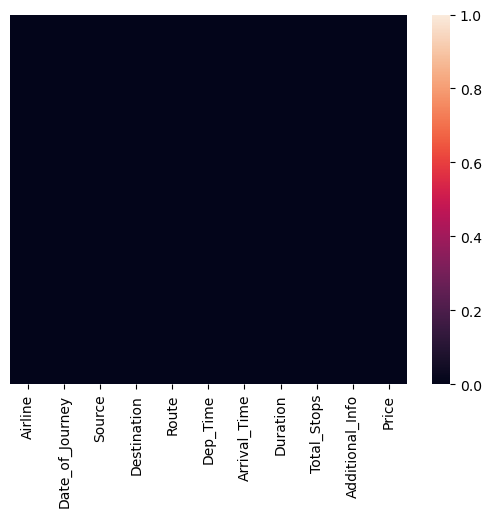

In [10]:
sns.heatmap(df.isnull(),yticklabels=False)

In [11]:
for i in ['Route','Total_Stops']:
    df[i].fillna(df[i].mode()[0], inplace=True)  # replacing  null values with mode

In [12]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<Axes: >

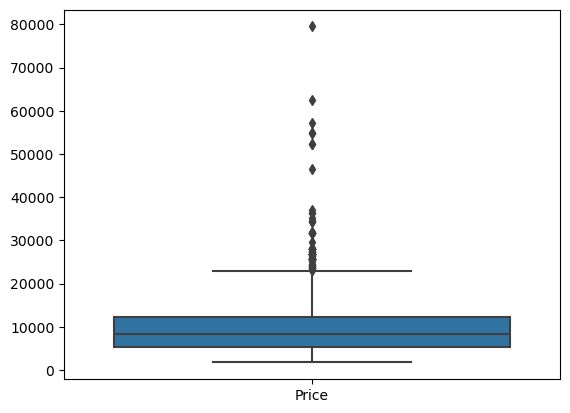

In [13]:
sns.boxplot(data=df)

In [14]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
df['Day'] = df['Date_of_Journey'].dt.day
df['Month'] = df['Date_of_Journey'].dt.month
df['Year'] = df['Date_of_Journey'].dt.year

In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


Q2- Perform Exploratory Data Analysis (EDA) tasks
a) Which airline is most preferred airline
c) Find the majority of the flights take off from which source
d) Find maximum flights land in which destination




In [16]:
most_preferred_airline = df['Airline'].value_counts()
most_preferred_airline

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [17]:
# From the above data we can see that the most preferred airline is Jet airways

In [18]:
most_common_source = df['Source'].value_counts()
most_common_source

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [19]:
# From the above data  we can see that the majority of the flights take off from Delhi

In [20]:
most_common_destination = df['Destination'].value_counts()
most_common_destination

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [21]:
# From the above data  we can see that the majority of the flights take off from Cochin

# Q3- Compare independent features with Target feature to check the impact on price

a) Which airline has the highest price
b) Check if the business class flights are high price or low and find only those flights which price is higher than 50k


In [22]:
highest_priced_airline = df.groupby('Airline')['Price'].max().idxmax()
print(f"Airline with the highest price: {highest_priced_airline}")

Airline with the highest price: Jet Airways Business


In [23]:
business_class_high_price = df[(df['Additional_Info'] == 'Business class') & (df['Price'] > 50000)]
print(business_class_high_price)

                    Airline Date_of_Journey    Source Destination  \
2924   Jet Airways Business      2019-03-01  Banglore   New Delhi   
5372   Jet Airways Business      2019-03-01  Banglore   New Delhi   
10364  Jet Airways Business      2019-03-01  Banglore   New Delhi   

                 Route Dep_Time Arrival_Time Duration Total_Stops  \
2924   BLR → BOM → DEL    05:45        11:25   5h 40m      1 stop   
5372   BLR → BOM → DEL    05:45        12:25   6h 40m      1 stop   
10364  BLR → MAA → DEL    09:45        14:25   4h 40m      1 stop   

      Additional_Info  Price  Day  Month  Year  
2924   Business class  79512    1      3  2019  
5372   Business class  62427    1      3  2019  
10364  Business class  57209    1      3  2019  


In [24]:
#Converting  categorical variables to numerical variables

In [25]:
df=df.drop(columns=['Route','Dep_Time','Arrival_Time'])

In [26]:
label_encoder = LabelEncoder()    # Applying label encoding
categorical_cols = ['Airline', 'Source', 'Destination',
                    'Total_Stops', 'Additional_Info','Duration']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [27]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,3,2019-03-24,0,5,240,4,8,3897,24,3,2019
1,1,2019-05-01,3,0,336,1,8,7662,1,5,2019
2,4,2019-06-09,2,1,106,1,8,13882,9,6,2019
3,3,2019-05-12,3,0,311,0,8,6218,12,5,2019
4,3,2019-03-01,0,5,303,0,8,13302,1,3,2019


In [28]:
df_num = df.select_dtypes(include=[np.number])
df_num

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,3,0,5,240,4,8,3897,24,3,2019
1,1,3,0,336,1,8,7662,1,5,2019
2,4,2,1,106,1,8,13882,9,6,2019
3,3,3,0,311,0,8,6218,12,5,2019
4,3,0,5,303,0,8,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,236,4,8,4107,9,4,2019
10679,1,3,0,237,4,8,4145,27,4,2019
10680,4,0,2,280,4,8,7229,27,4,2019
10681,10,0,5,238,4,8,12648,1,3,2019


# Build multiple model by using different algorithm such as Linear Regression, Decision Tree, and Random Forest etc. and check the performance of your model

In [29]:
df_encoded = pd.get_dummies(df_num, drop_first=True)

X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

In [30]:
X

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Day,Month,Year
0,3,0,5,240,4,8,24,3,2019
1,1,3,0,336,1,8,1,5,2019
2,4,2,1,106,1,8,9,6,2019
3,3,3,0,311,0,8,12,5,2019
4,3,0,5,303,0,8,1,3,2019
...,...,...,...,...,...,...,...,...,...
10678,0,3,0,236,4,8,9,4,2019
10679,1,3,0,237,4,8,27,4,2019
10680,4,0,2,280,4,8,27,4,2019
10681,10,0,5,238,4,8,1,3,2019


# Linear Regression model

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [33]:
np.round(lr_model.intercept_,3)

14393.731

In [34]:
np.round(lr_model.coef_,4)

array([  -31.6006,  -342.3013,    84.4387,    -2.8169, -1519.2683,
         130.5889,   -71.5441,  -398.99  ,     0.    ])

In [35]:
y_pred_lr = lr_model.predict(X_train)
mse_lr = np.sqrt(mean_squared_error(y_train, y_pred_lr))
r2_lr = r2_score(y_train, y_pred_lr)

In [36]:
print(f"Linear Regression MSE: {mse_lr}, R2 Score: {r2_lr}")

Linear Regression MSE: 3648.256872955997, R2 Score: 0.3747335233010567


# Random Forest

In [37]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)


RandomForestRegressor()

In [38]:
rf.score(X_train, y_train)

0.9584939884729404

# Decision Tree

In [39]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)




DecisionTreeRegressor()

In [40]:
y_pred_dt = dt_model.predict(X_train)
y_pred_dt

array([23528. , 12373. ,  5583. , ...,  7670. ,  6430.4, 10262. ])

In [41]:
rmse_dt = np.sqrt(mean_squared_error(y_train, y_pred_dt))
rmse_dt

746.3087337072883

In [42]:
r2_dt = r2_score(y_train, y_pred_dt)
r2_dt

0.9738343592544222

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Building a pipeline for preprocessing
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # You can add more steps if needed
    ('model', RandomForestRegressor())
])

# Tune the model
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best model parameters: {grid_search.best_params_}")

Best model parameters: {'model__max_depth': 10, 'model__n_estimators': 100}


In [44]:
print(f"Best R2 Score: {grid_search.best_score_}")

Best R2 Score: 0.8285522591932051


# Compare all of the models and justify your choice about the optimum model by using different evaluation technique and tune the models as per the requirement.

 linear Regression R2 score is 37 and RMSE is 3646.29
 Random Forest R2 score is 95.86 , after tuning we get 83
 Decision tree R2 score is 80.96

# So,we will select Random Forest for our model for prdections as it is having highest R2 score

# Write a conclusion from the business point of view. Finally perform the same preprocessing technique for test data best practice using pipeline

Model on Test Data

In [46]:
y_pred_lr = lr_model.predict(X_test)
mse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

In [47]:
print(f"Linear Regression MSE: {mse_lr}, R2 Score: {r2_lr}")

Linear Regression MSE: 3646.24905185191, R2 Score: 0.371803370259009


# Random Forest on train data

In [48]:
rf.score(X_test, y_test)

0.8619386791449715

# Since R2 score in training is coming  maximum for Random Forest so  we will select the decision tree for the model